**Credit card Fraud Prediction**
# 💳 Credit Card Fraud Detection – Model Choice Justification

In this project, I experimented with **three models** to detect fraudulent transactions:

### 1. Logistic Regression
- Serves as a **baseline model**.
- Very **fast and interpretable**, which is important in financial institutions that require transparency.
- Provides a clear benchmark to compare with more complex models.

### 2. Random Forest
- An **ensemble of decision trees**, capable of capturing complex nonlinear patterns in data.
- Robust to noise and overfitting, and provides **feature importance** scores, which help explain the model.
- Handles class imbalance better using `class_weight`.

### 3. XGBoost (Extreme Gradient Boosting)
- Known as one of the **most powerful algorithms for tabular data**.
- Provides excellent **precision-recall balance**, crucial in fraud detection where false negatives (missed fraud) are very costly.
- Supports `scale_pos_weight` to directly handle imbalance in fraud datasets.
- Typically achieves the **highest recall**, meaning it catches more fraudulent transactions.

---

### ⚖️ Why these three models?
- Fraud detection requires a balance of:
  - **Recall** (catching as many frauds as possible),
  - **Precision** (not flagging too many normal transactions as fraud),
  - **Interpretability** (important in finance/banking regulations).
- Logistic Regression ensures **interpretability**, Random Forest provides **robustness**, and XGBoost delivers **state-of-the-art performance**.

---


*Install Important libraries*

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("All Libraries are Successfully")

All Libraries are Successfully


# 📊 Dataset Characteristics

The dataset used in this project is the **Credit Card Fraud Detection dataset** (Kaggle).  
It contains transactions made by European cardholders in **September 2013**.

### Key Points:
- **Number of rows**: 284,807 transactions  
- **Number of columns**: 31 features  
- **Class Distribution**:
  - Fraudulent transactions: **492 (0.172%)**
  - Non-fraudulent transactions: **284,315 (99.828%)**
  - ⚠️ Highly **imbalanced dataset**

### Features:
- **Time** → Seconds elapsed between this transaction and the first transaction in the dataset.  
- **V1 … V28** → 28 anonymized features (results of PCA transformation for confidentiality).  
- **Amount** → Transaction amount (can be used for cost-sensitive learning).  
- **Class** → Target variable:
  - `0` = Non-fraud
  - `1` = Fraud

### Challenges:
- **Severe class imbalance** (fraud cases are <0.2%).  
- **Anonymized features** (V1–V28) → limits direct interpretability.  
- **High cost of false negatives** → missing a fraud is much worse than flagging a genuine transaction.


In [23]:
df = pd.read_csv('creditcard.csv')
print("Data is Successfully Loaded")

Data is Successfully Loaded


In [24]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [25]:
print("Information about the dataset:")
print(df.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 no

**EDA**

In [26]:
print(df.shape)

(284807, 31)


In [27]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [28]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

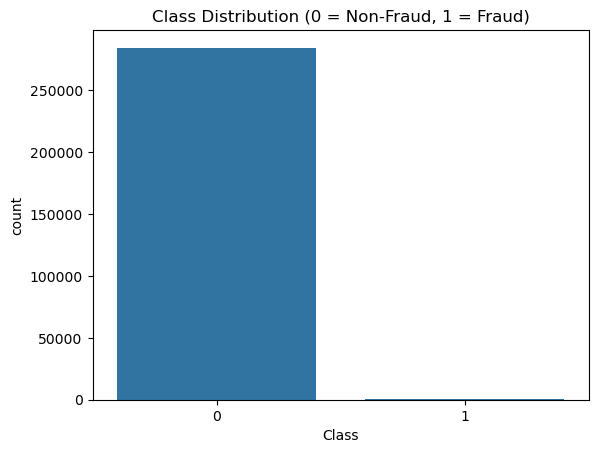

Class
0    284315
1       492
Name: count, dtype: int64
Fraud percentage: 0.1727485630620034


In [29]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

fraud_count = df['Class'].value_counts()
print(fraud_count)
print("Fraud percentage:", (fraud_count[1] / fraud_count.sum())*100)

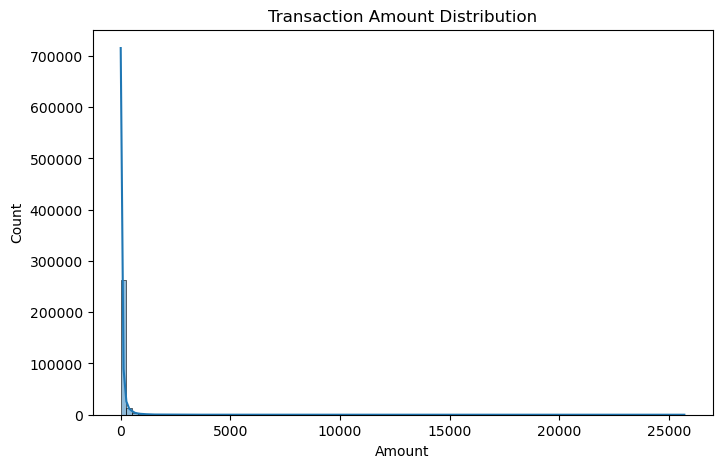

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

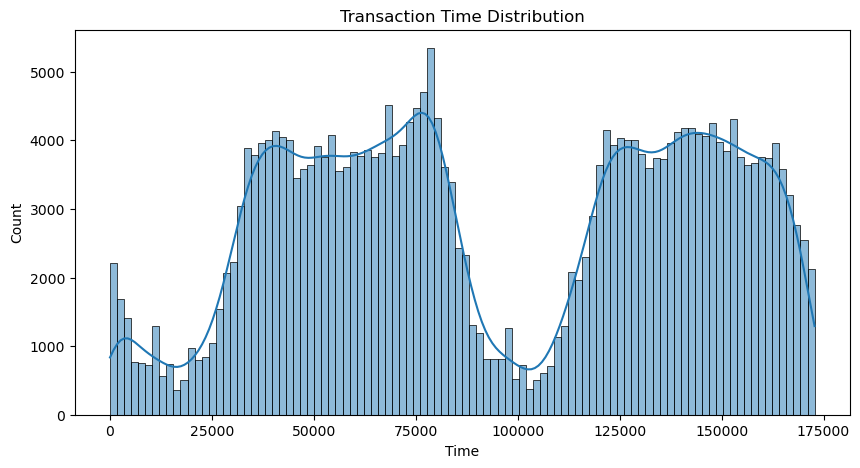

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Transaction Time Distribution")
plt.show()

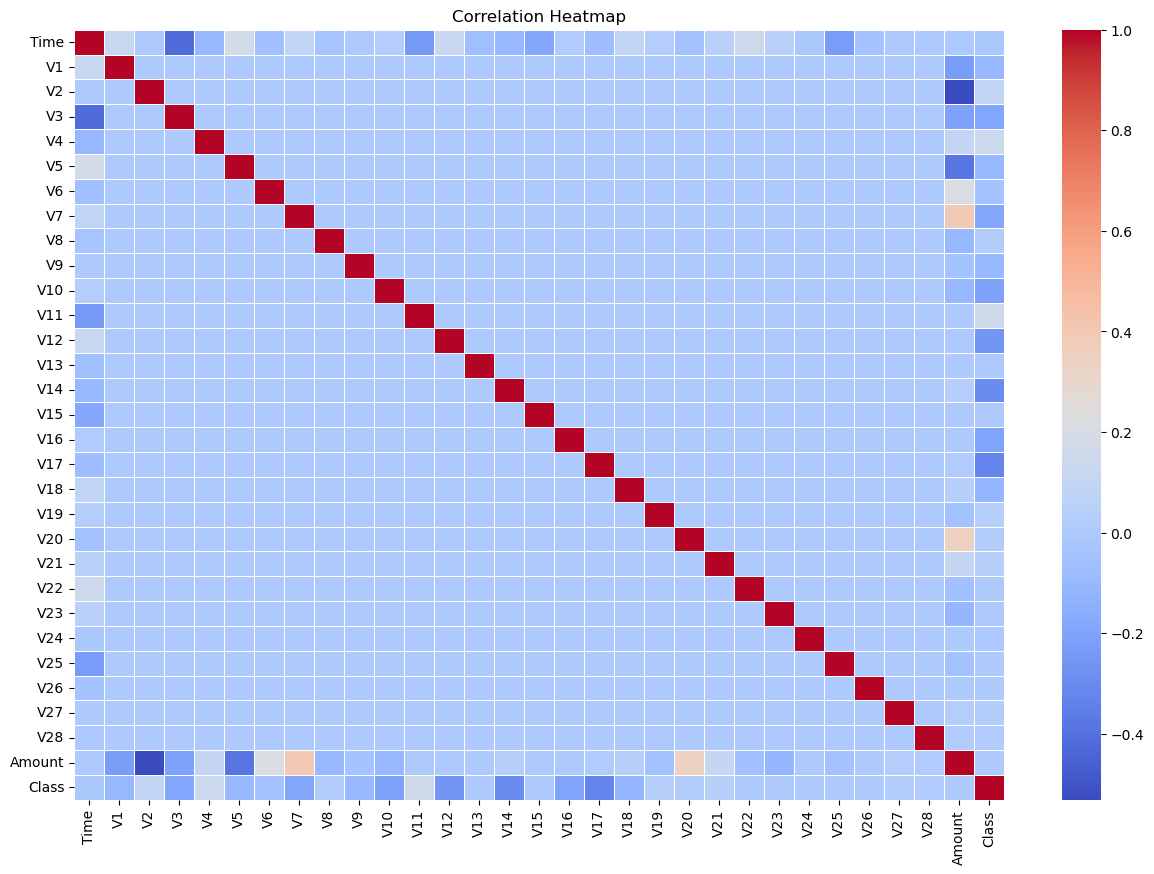

In [32]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Data Preprocessing**

In [33]:
X = df.drop('Class', axis=1)
y = df['Class']

In [66]:
scaler = StandardScaler()
X['normAmount'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
X['normTime'] = scaler.fit_transform(X['Time'].values.reshape(-1,1))
X = X.drop(['Amount', 'Time'], axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SMOTE**
*Class has imbalanced Dataset
So I use smote*

In [36]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

**Logistic Regression**

In [37]:
lr = LogisticRegression()
lr.fit(X_res, y_res)

c:\Users\Friendss\miniconda3\envs\mlops\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
y_pred_lr = lr.predict(X_test)


In [40]:
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr, digits=4))

Logistic Regression Report
              precision    recall  f1-score   support

           0     0.9998    0.9826    0.9911     56864
           1     0.0806    0.8878    0.1478        98

    accuracy                         0.9824     56962
   macro avg     0.5402    0.9352    0.5695     56962
weighted avg     0.9982    0.9824    0.9897     56962



**Random Forest Classifier**

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = rf.predict(X_test)

In [43]:
print("Classification report and confusion matrix for Random Forest:")
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

Classification report and confusion matrix for Random Forest:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8737    0.8469    0.8601        98

    accuracy                         0.9995     56962
   macro avg     0.9367    0.9234    0.9299     56962
weighted avg     0.9995    0.9995    0.9995     56962

[[56852    12]
 [   15    83]]


### Random Forest with SMOTE

- Random Forest significantly outperforms Logistic Regression after SMOTE.  
- Fraud detection metrics:  
  - Precision = **87.4%** (vs. 8% for Logistic Regression)  
  - Recall = **84.7%** (slightly lower than LR’s 88.7%)  
  - F1 = **0.86** (huge improvement from 0.14)  
- Confusion Matrix shows:
  - 15 frauds missed (false negatives)  
  - 12 genuine transactions wrongly flagged (false positives)

✅ Much better precision–recall balance.  
✅ Suitable for production-level fraud detection.  


In [48]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_res, y_res)

c:\Users\Friendss\miniconda3\envs\mlops\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [49]:
print("classification_report and confusion matrix for XGBoost:")
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb, digits=4))
print(confusion_matrix(y_test, y_pred_xgb))

classification_report and confusion matrix for XGBoost:
              precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     56864
           1     0.8000    0.8571    0.8276        98

    accuracy                         0.9994     56962
   macro avg     0.8999    0.9284    0.9136     56962
weighted avg     0.9994    0.9994    0.9994     56962

[[56843    21]
 [   14    84]]


**Hyperparameter Tunning for XGBoost**

In [50]:
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 4, 5, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.25, 0.5, 1]
}

In [51]:
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,   # try 20 random combos
    scoring="f1",   # focus on fraud detection quality
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [52]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Friendss\miniconda3\envs\mlops\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 0.25, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [53]:
best_model = xgb_random.best_estimator_
print("Best Parameters:", xgb_random.best_params_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [54]:
print("\nClassification Report (XGBoost Tuned):")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (XGBoost Tuned):")
print(confusion_matrix(y_test, y_pred))


Classification Report (XGBoost Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix (XGBoost Tuned):
[[56852    12]
 [   15    83]]


**Saving Model Using Pickle**

In [59]:
model_filename = "model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Model save to {model_filename}")

Model save to model.pkl


In [67]:
scaler_filename = "scaler.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved in {scaler_filename}")


Scaler saved in scaler.pkl


In [68]:
#verify that we can model back
print("\nVerifying saved file")
with open(model_filename , 'rb') as file:
    loaded_model =  pickle.load(file)

with open(scaler_filename , 'rb') as file:
    loaded_scaler = pickle.load(file)
print("Model and scaler are loaded for verification")


Verifying saved file
Model and scaler are loaded for verification


In [69]:
models = {
    
    "XGBoost Tuned": loaded_model
}

for name, model in models.items():
    print(f"\n📌 {name} Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


📌 XGBoost Tuned Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56863     1]
 [   22    76]]
